# DEATH ROW DATASET

In [1]:
import numpy as np                   # 2D arrays
import matplotlib.pyplot as plt       # for data visualisation
import pandas as pd                   # reading csv file and turning to dataframe
import seaborn as sns                 # for Data visualisation
import glob
import folium
import re
import matplotlib.pyplot as plt
from dateutil.parser import parse
from datetime import datetime

In [2]:
# Uploading CSV File and naming as Death_row
data = pd.read_csv(r"C:\Users\micha\Downloads\archive (9)\Death Row Data.csv")
Death_row = data

In [3]:
# Printing first 5 rows of Data
Death_row.head()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,01/17/1977,Gary Gilmore,36,Male,White,Murder,1,Male,White,Utah,UT,West,Firing Squad,No,Yes,No,No
1,05/25/1979,John Spenkelink,30,Male,White,Murder,1,Male,White,Leon,FL,South,Electrocution,No,No,No,No
2,10/22/1979,Jesse Bishop,46,Male,White,Murder,1,Male,White,Clark,NV,West,Gas Chamber,No,Yes,No,No
3,03/09/1981,Steven Judy,24,Male,White,Murder,4,"2 Male, 2 Female",White,Marion,IN,Midwest,Electrocution,No,Yes,No,No
4,08/10/1982,Frank Coppola,38,Male,White,Murder,1,Male,White,Newport News City,VA,South,Electrocution,No,Yes,No,No


In [4]:
# Printing last 5 rows of Data
Death_row.tail()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
1437,10/05/2016,Barney Fuller,53,Male,White,Murder,2,"1 Male, 1 Female",White,Houston County,TX,South,Lethal Injection,No,Yes,No,No
1438,10/19/2016,Gregory Lawler,63,Male,White,Murder,1,Male,White,Fulton,GA,South,Lethal Injection,No,No,No,No
1439,11/16/2016,Steven Spears,54,Male,White,Murder,1,Female,White,Lumpkin,GA,South,Lethal Injection,No,Yes,No,No
1440,12/06/2016,William Sallie,50,Male,White,Murder,1,Male,White,Bacon,GA,South,Lethal Injection,No,No,No,No
1441,12/08/2016,Ronald Smith,45,Male,White,Murder,1,Male,White,Madison,AL,South,Lethal Injection,No,No,No,No


# CLEANING DATA

In [5]:
# Checking for sum Total of Duplicates
Death_row.duplicated().sum()

0

In [6]:
# Checking for Null Values
Death_row.isnull()

,Date,Name,Age,Sex,Race,Crime,Victim Count,Victim Sex,Victim Race,County,State,Region,Method,Juvenile,Volunteer,Federal,Foreign National
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1438,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1439,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1440,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Replacing NaN Values with True
Death_row.fillna("NaN", inplace=True)

In [8]:
# Displaying Column Headers
Death_row.columns

Index(['Date', 'Name', 'Age', 'Sex', 'Race', 'Crime', 'Victim Count',
       'Victim Sex', 'Victim Race', 'County', 'State', 'Region', 'Method',
       'Juvenile', 'Volunteer', 'Federal', 'Foreign National'],
      dtype='object')

In [9]:
# Discriptions values for Columns
Death_row.describe

<bound method NDFrame.describe of             Date             Name  Age   Sex   Race   Crime  Victim Count  \
0     01/17/1977     Gary Gilmore   36  Male  White  Murder             1   
1     05/25/1979  John Spenkelink   30  Male  White  Murder             1   
2     10/22/1979     Jesse Bishop   46  Male  White  Murder             1   
3     03/09/1981      Steven Judy   24  Male  White  Murder             4   
4     08/10/1982    Frank Coppola   38  Male  White  Murder             1   
...          ...              ...  ...   ...    ...     ...           ...   
1437  10/05/2016    Barney Fuller   53  Male  White  Murder             2   
1438  10/19/2016   Gregory Lawler   63  Male  White  Murder             1   
1439  11/16/2016    Steven Spears   54  Male  White  Murder             1   
1440  12/06/2016   William Sallie   50  Male  White  Murder             1   
1441  12/08/2016     Ronald Smith   45  Male  White  Murder             1   

            Victim Sex Victim Race       

In [10]:
# Displaying Number of Rows & Columns
Death_row.shape

(1442, 17)

In [11]:
# Data Type of each Column
Death_row.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1442 entries, 0 to 1441
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              1442 non-null   object
 1   Name              1442 non-null   object
 2   Age               1442 non-null   int64 
 3   Sex               1442 non-null   object
 4   Race              1442 non-null   object
 5   Crime             1442 non-null   object
 6   Victim Count      1442 non-null   int64 
 7   Victim Sex        1442 non-null   object
 8   Victim Race       1442 non-null   object
 9   County            1442 non-null   object
 10  State             1442 non-null   object
 11  Region            1442 non-null   object
 12  Method            1442 non-null   object
 13  Juvenile          1442 non-null   object
 14  Volunteer         1442 non-null   object
 15  Federal           1442 non-null   object
 16  Foreign National  1442 non-null   object
dtypes: int64(2), o

# GENDER COUND OF EACH KILLER

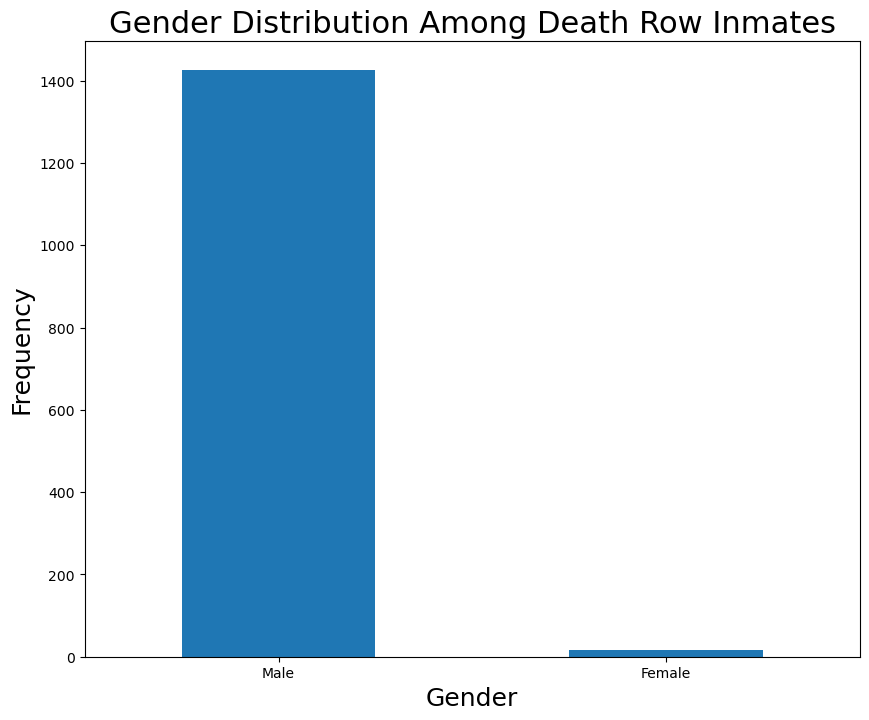

In [12]:
# Frequency distribution of gender
gender_counts = Death_row['Sex'].value_counts()

# Frequency distribution of race
race_counts = Death_row['Race'].value_counts()

# Generating a bar chart to visualize the gender distribution
plt.figure(figsize=(10, 8)) # set figure size
gender_counts.plot(kind='bar', rot=0)
plt.title("Gender Distribution Among Death Row Inmates", fontsize=22)
plt.xlabel('Gender', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

# MOST COMMON CRIMES THAT LEAD TO DETAH PENALTY

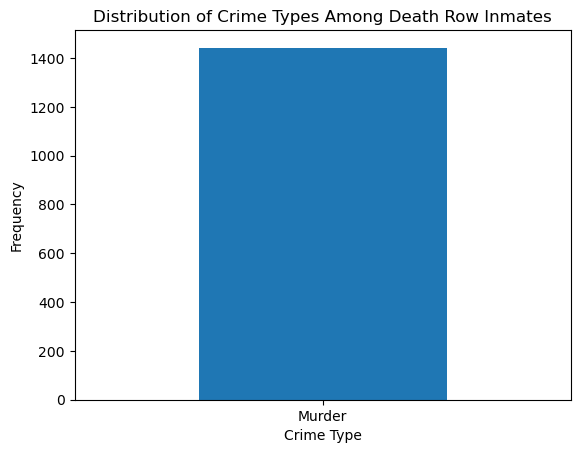

In [13]:
# Frequency distribution of crime types
crime_counts = Death_row['Crime'].value_counts()

# Generating a bar chart to visualize the crime type distribution
crime_counts.plot(kind='bar', rot=0)
plt.title('Distribution of Crime Types Among Death Row Inmates')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.show()

# COMMON AGE OF CONVICTED KILLER

count    1442.000000
mean       41.479889
std         9.471676
min        22.000000
25%        34.000000
50%        40.000000
75%        47.000000
max        77.000000
Name: Age, dtype: float64


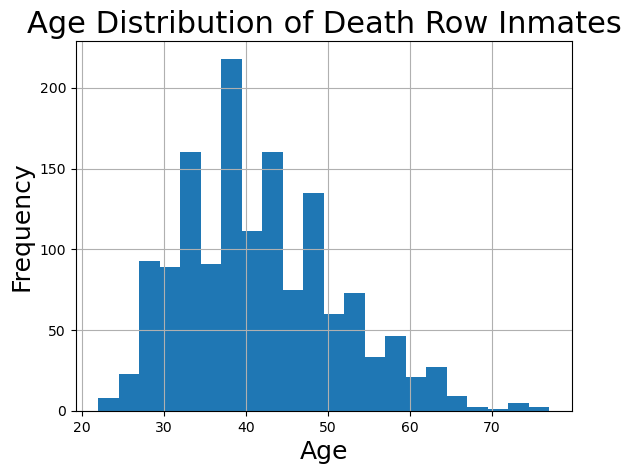

Crime
Murder    41.479889
Name: Age, dtype: float64


In [14]:
# Descriptive statistics of the age distribution
age_stats = Death_row['Age'].describe()
print(age_stats)

# Frequency distribution of age
age_counts = Death_row['Age'].value_counts()

# Generating a histogram to visualize the age distribution
Death_row.hist(column='Age', bins=22)
plt.title('Age Distribution of Death Row Inmates', fontsize=22)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Frequency', fontsize=18)
plt.show()

# Analyzing the relationship between age and crime type
age_crime_ct = Death_row.groupby('Crime')['Age'].mean()
print(age_crime_ct)

#  Juvenile offenders on death row and analyze their demographics and crimes

In [15]:
# Subsets of dataframe to only include juvenile offenders
juvenile_df = Death_row[Death_row['Juvenile'] == 'Y']

# Frequency distribution of gender values for juvenile offenders
juvenile_gender_counts = juvenile_df['Sex'].value_counts()

# Checking if the juvenile_gender_counts array is empty
if juvenile_gender_counts.empty:
    print('No gender data for juvenile offenders found!')
else:
    # Create a pie chart using Seaborn
    sns.set()
    plt.figure(figsize=(6,6))
    plt.title('Gender Distribution Among Juvenile Offenders on Death Row')
    sns.barplot(x=juvenile_gender_counts.index, y=juvenile_gender_counts)
    plt.ylabel('Count')
    plt.show()

No gender data for juvenile offenders found!


# Executions by Method and Gender

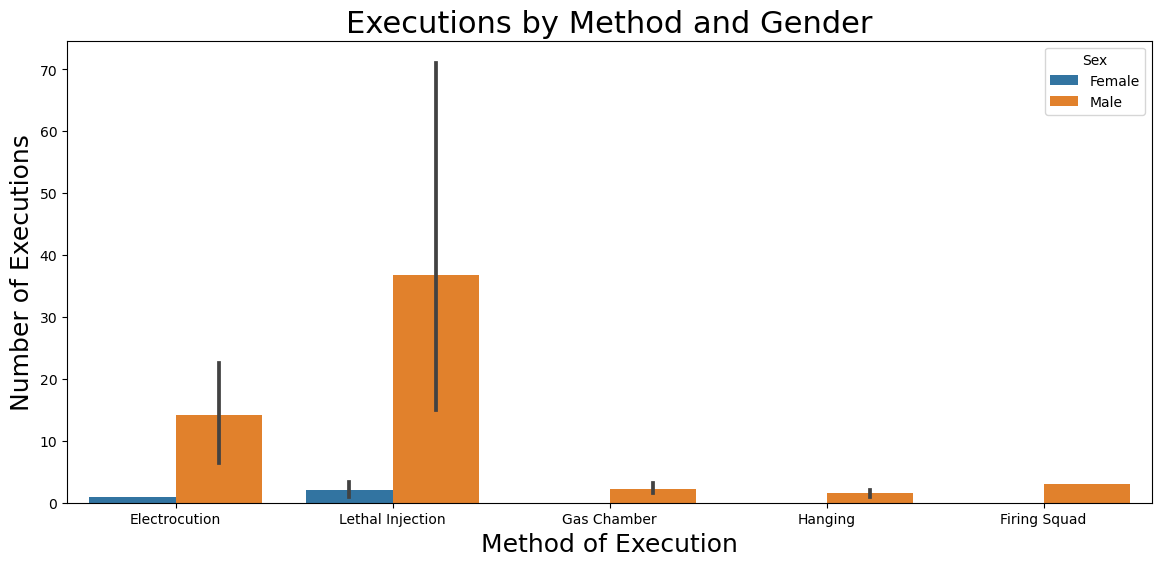

In [16]:
# Grouping the data by state, gender, and method of execution
method_counts = Death_row.groupby(["State", "Sex", "Method"]).count().reset_index()

# Ploting the result with Seaborn's barplot
plt.figure(figsize=(14, 6))
sns.barplot(data=method_counts, x="Method", y="Name", hue="Sex")
plt.title("Executions by Method and Gender", fontsize=22)
plt.xlabel("Method of Execution", fontsize=18)
plt.ylabel("Number of Executions", fontsize=18)
plt.show()

In [17]:
# Grouping the data by state, gender, and method of execution
method_counts = Death_row.groupby(['State', 'Sex', 'Method'])

# Counting the number of executions for each method in each group
method_counts = method_counts.count()

# Printing the resulting dataframe
print(method_counts)

                               Date  Name  Age  Race  Crime  Victim Count  \
State Sex    Method                                                         
AL    Female Electrocution        1     1    1     1      1             1   
      Male   Electrocution       23    23   23    23     23            23   
             Lethal Injection    34    34   34    34     34            34   
AR    Female Lethal Injection     1     1    1     1      1             1   
      Male   Electrocution        1     1    1     1      1             1   
...                             ...   ...  ...   ...    ...           ...   
VA    Male   Electrocution       31    31   31    31     31            31   
             Lethal Injection    79    79   79    79     79            79   
WA    Male   Hanging              2     2    2     2      2             2   
             Lethal Injection     3     3    3     3      3             3   
WY    Male   Lethal Injection     1     1    1     1      1             1   

# Executions by Method, Gender, and State

<Figure size 2400x3000 with 0 Axes>

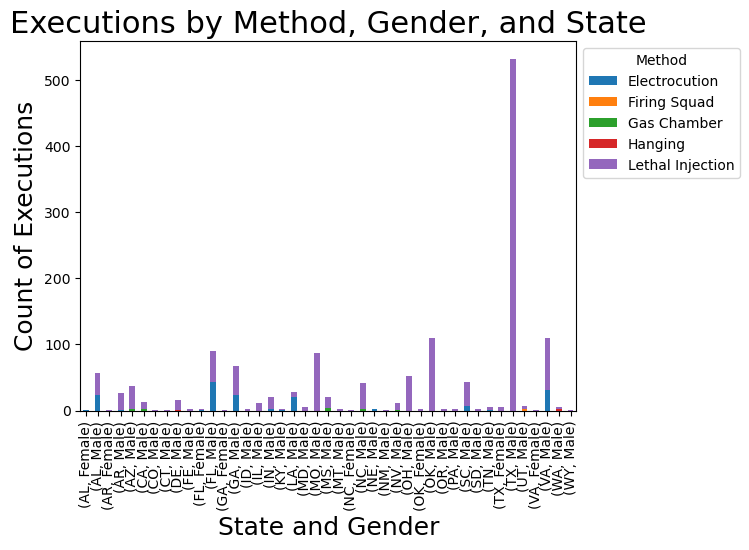

In [18]:
# Creating a pivot table to aggregate the data
pivot_table = Death_row.pivot_table(values='Name', index=['State', 'Sex'], columns='Method', 
                                    aggfunc='count', fill_value=0)

plt.figure(figsize=(24,30))

# Plot the pivot table as a grouped bar chart
pivot_table.plot(kind='bar', stacked=True)
plt.legend(title='Method', bbox_to_anchor=(1, 1))
plt.title('Executions by Method, Gender, and State', fontsize=22)
plt.xlabel('State and Gender', fontsize=18)
plt.ylabel('Count of Executions', fontsize=18)
plt.show()

# Executions of Female Offenders in Florida

In [19]:
# Filtering the results to show only data for female offenders in Florida
florida_female_counts = method_counts.loc[('FL', 'Female')]
print(florida_female_counts)

                  Date  Name  Age  Race  Crime  Victim Count  Victim Sex  \
Method                                                                     
Electrocution        1     1    1     1      1             1           1   
Lethal Injection     1     1    1     1      1             1           1   

                  Victim Race  County  Region  Juvenile  Volunteer  Federal  \
Method                                                                        
Electrocution               1       1       1         1          1        1   
Lethal Injection            1       1       1         1          1        1   

                  Foreign National  
Method                              
Electrocution                    1  
Lethal Injection                 1  


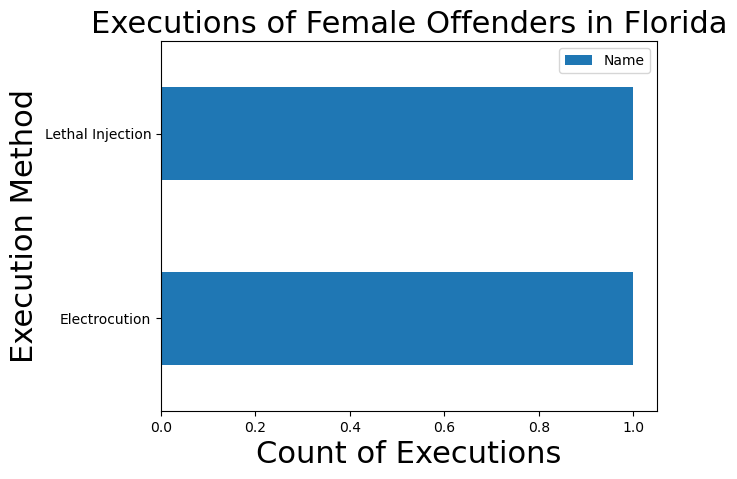

In [20]:
# Filtering the data to show only female offenders in Florida
florida_female_executions = Death_row[(Death_row['State'] == 'FL') & (Death_row['Sex'] == 'Female')]

# Grouping the data by method of execution and count the number of executions for each method
florida_female_methods = florida_female_executions.groupby('Method')['Name'].count().reset_index()

# Creating a horizontal bar chart
florida_female_methods.plot(kind='barh', x='Method', y='Name')
plt.title('Executions of Female Offenders in Florida', fontsize=22)
plt.xlabel('Count of Executions', fontsize=22)
plt.ylabel('Execution Method', fontsize=22)
plt.show()

# Executions of Female Offenders in Texas

In [21]:
# Filtering the results to show only data for female offenders in Texas
Texas_female_counts = method_counts.loc[('TX', 'Female')]
print(Texas_female_counts)

                  Date  Name  Age  Race  Crime  Victim Count  Victim Sex  \
Method                                                                     
Lethal Injection     6     6    6     6      6             6           6   

                  Victim Race  County  Region  Juvenile  Volunteer  Federal  \
Method                                                                        
Lethal Injection            6       6       6         6          6        6   

                  Foreign National  
Method                              
Lethal Injection                 6  


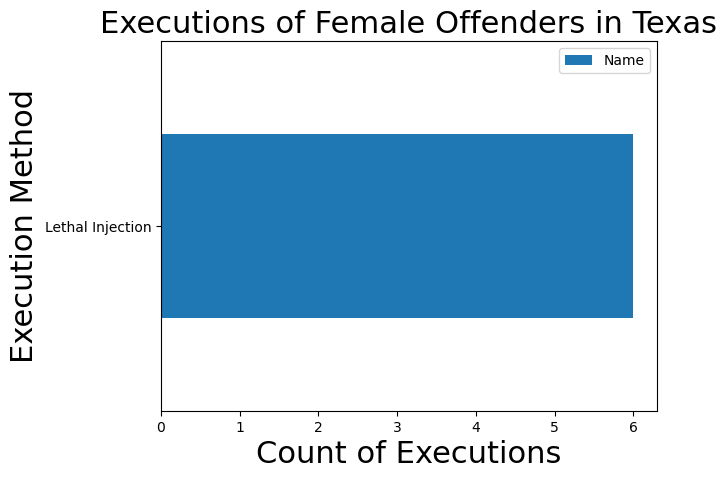

In [22]:
# Filtering the data to show only female offenders in Texas
Texas_female_executions = Death_row[(Death_row['State'] == 'TX') & (Death_row['Sex'] == 'Female')]

# Grouping the data by method of execution and count the number of executions for each method
Texas_female_methods = Texas_female_executions.groupby('Method')['Name'].count().reset_index()

# Creating a horizontal bar chart
Texas_female_methods.plot(kind='barh', x='Method', y='Name')
plt.title('Executions of Female Offenders in Texas', fontsize=22)
plt.xlabel('Count of Executions', fontsize=22)
plt.ylabel('Execution Method', fontsize=22)
plt.show()

# Executions of Male Offenders in Florida

In [23]:
# Filtering the results to show only data for Male offenders in Florida
florida_male_counts = method_counts.loc[('FL', 'Male')]
print(florida_male_counts)

                  Date  Name  Age  Race  Crime  Victim Count  Victim Sex  \
Method                                                                     
Electrocution       43    43   43    43     43            43          43   
Lethal Injection    47    47   47    47     47            47          47   

                  Victim Race  County  Region  Juvenile  Volunteer  Federal  \
Method                                                                        
Electrocution              43      43      43        43         43       43   
Lethal Injection           47      47      47        47         47       47   

                  Foreign National  
Method                              
Electrocution                   43  
Lethal Injection                47  


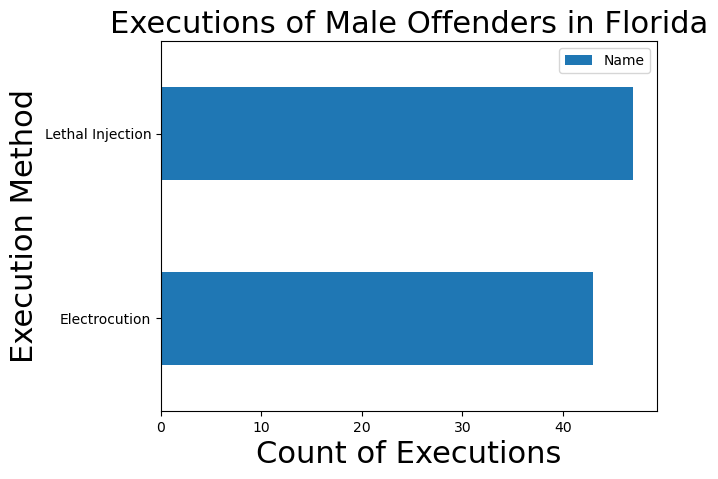

In [24]:
# Filtering the data to show only Male offenders in Florida
Florida_male_executions = Death_row[(Death_row['State'] == 'FL') & (Death_row['Sex'] == 'Male')]

# Grouping the data by method of execution and counting the number of executions for each method
Florida_male_methods = Florida_male_executions.groupby('Method')['Name'].count().reset_index()

# Create a horizontal bar chart
Florida_male_methods.plot(kind='barh', x='Method', y='Name')
plt.title('Executions of Male Offenders in Florida', fontsize=22)
plt.xlabel('Count of Executions', fontsize=22)
plt.ylabel('Execution Method', fontsize=22)
plt.show()

# Executions of Male Offenders in Texas

In [25]:
# Filtering the results to show only data for Male offenders in Texas
Texas_male_counts = method_counts.loc[('TX', 'Male')]
print(Texas_male_counts)

                  Date  Name  Age  Race  Crime  Victim Count  Victim Sex  \
Method                                                                     
Lethal Injection   532   532  532   532    532           532         532   

                  Victim Race  County  Region  Juvenile  Volunteer  Federal  \
Method                                                                        
Lethal Injection          532     532     532       532        532      532   

                  Foreign National  
Method                              
Lethal Injection               532  


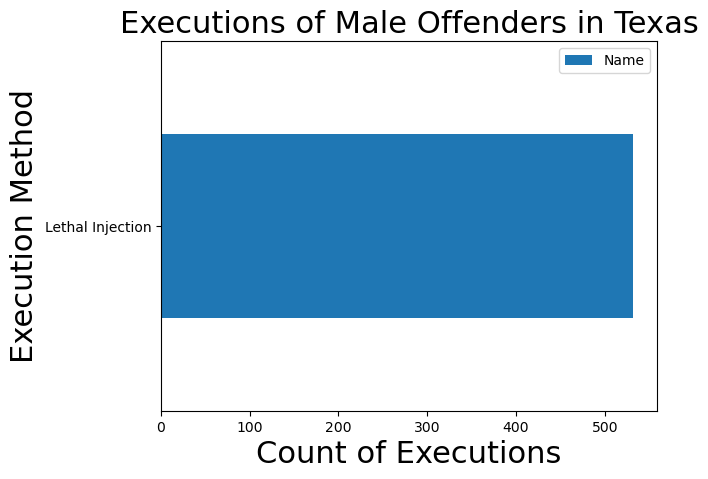

In [26]:
# Filtering the data to show only Male offenders in Texas
Texas_male_executions = Death_row[(Death_row['State'] == 'TX') & (Death_row['Sex'] == 'Male')]

# Grouping the data by method of execution and counting the number of executions for each method
Texas_male_methods = Texas_male_executions.groupby('Method')['Name'].count().reset_index()

# Create a horizontal bar chart
Texas_male_methods.plot(kind='barh', x='Method', y='Name')
plt.title('Executions of Male Offenders in Texas', fontsize=22)
plt.xlabel('Count of Executions', fontsize=22)
plt.ylabel('Execution Method', fontsize=22)
plt.show()

In [27]:
# Converting the "Date" column to datetime type
Death_row['Date'] = pd.to_datetime(Death_row['Date'])

# Extracting year from the "Date" column
Death_row['Year'] = Death_row['Date'].dt.year


In [28]:
# Grouping by year, state, and method, and count the number of executions
execution_counts = Death_row.groupby(['Year', 'State', 'Method']).size().reset_index(name='Count')

# Printing the execution counts per year, per state, and by method

print(execution_counts)

     Year State            Method  Count
0    1977    UT      Firing Squad      1
1    1979    FL     Electrocution      1
2    1979    NV       Gas Chamber      1
3    1981    IN     Electrocution      1
4    1982    TX  Lethal Injection      1
..    ...   ...               ...    ...
397  2016    AL  Lethal Injection      2
398  2016    FL  Lethal Injection      1
399  2016    GA  Lethal Injection      9
400  2016    MO  Lethal Injection      1
401  2016    TX  Lethal Injection      7

[402 rows x 4 columns]


# Executions per Year, per State, by Method

In [29]:
# Aggregating the execution counts by Year, State, and Method
agg_counts = execution_counts.groupby(['Year', 'State', 'Method'])['Count'].sum().reset_index()

# using a Pivot table for the DataFrame for visualization
pivot_table = pd.pivot_table(agg_counts, values='Count', index='Year', columns='State', aggfunc='sum')


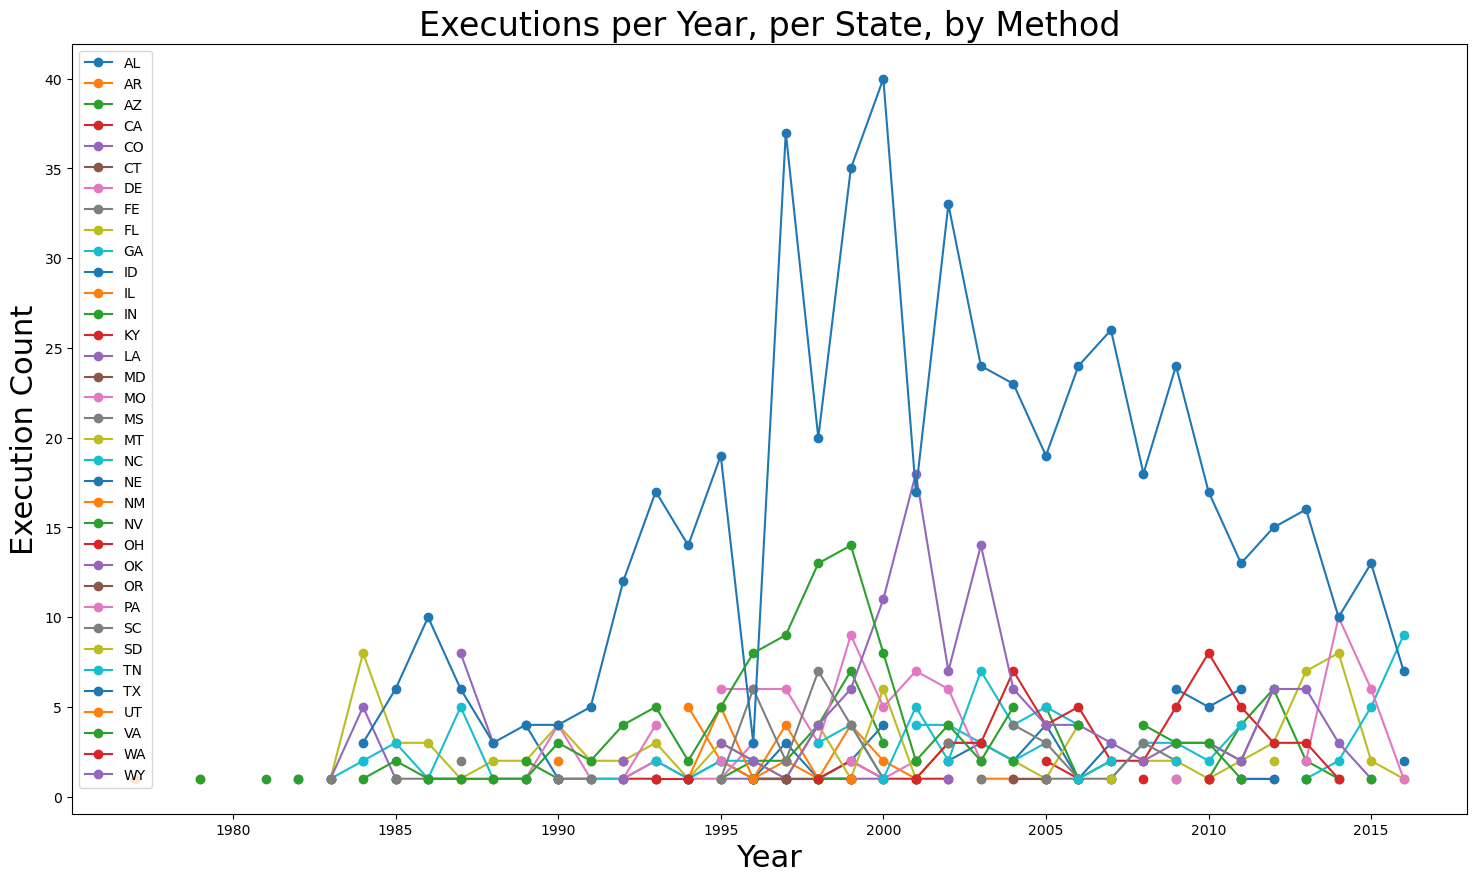

In [30]:
# Creatingline plot for each state 
pivot_table.plot(kind='line', marker='o', figsize=(18, 10))

# Setinge labels and title of the plot
plt.title('Executions per Year, per State, by Method', fontsize=24)
plt.xlabel('Year', fontsize=22)
plt.ylabel('Execution Count', fontsize=22)

# Showinge legend
plt.legend(loc='upper left')

# Displayinge plot
plt.show()

# Distribution of Race & Age Distribution

In [31]:
# Counting of unique values in each column:

race_counts = Death_row['Race'].value_counts()
age_counts = Death_row['Age'].value_counts()
sex_counts = Death_row['Sex'].value_counts()


In [32]:
print("Race counts:\n", race_counts)
print("\nAge counts:\n", age_counts)
print("\nSex counts:\n", sex_counts)

Race counts:
 White              803
Black              495
Latino             120
Native American     16
Asian                6
Other                2
Name: Race, dtype: int64

Age counts:
 38    76
37    71
39    71
43    59
33    59
41    58
47    58
42    57
40    53
34    52
31    49
32    49
35    47
44    44
36    44
49    43
46    41
30    40
29    34
48    34
45    34
51    32
27    30
52    29
28    29
50    28
53    24
54    20
56    17
55    16
58    16
57    15
59    15
61    14
62    13
63    12
26    12
25    11
60     7
24     5
66     5
65     4
74     3
23     2
64     2
67     2
72     2
22     1
77     1
76     1
71     1
Name: Age, dtype: int64

Sex counts:
 Male      1426
Female      16
Name: Sex, dtype: int64


In [33]:
# Summary statistics for the age column:

age_summary = Death_row['Age'].describe()
print(age_summary)

count    1442.000000
mean       41.479889
std         9.471676
min        22.000000
25%        34.000000
50%        40.000000
75%        47.000000
max        77.000000
Name: Age, dtype: float64


# Distribution of Race

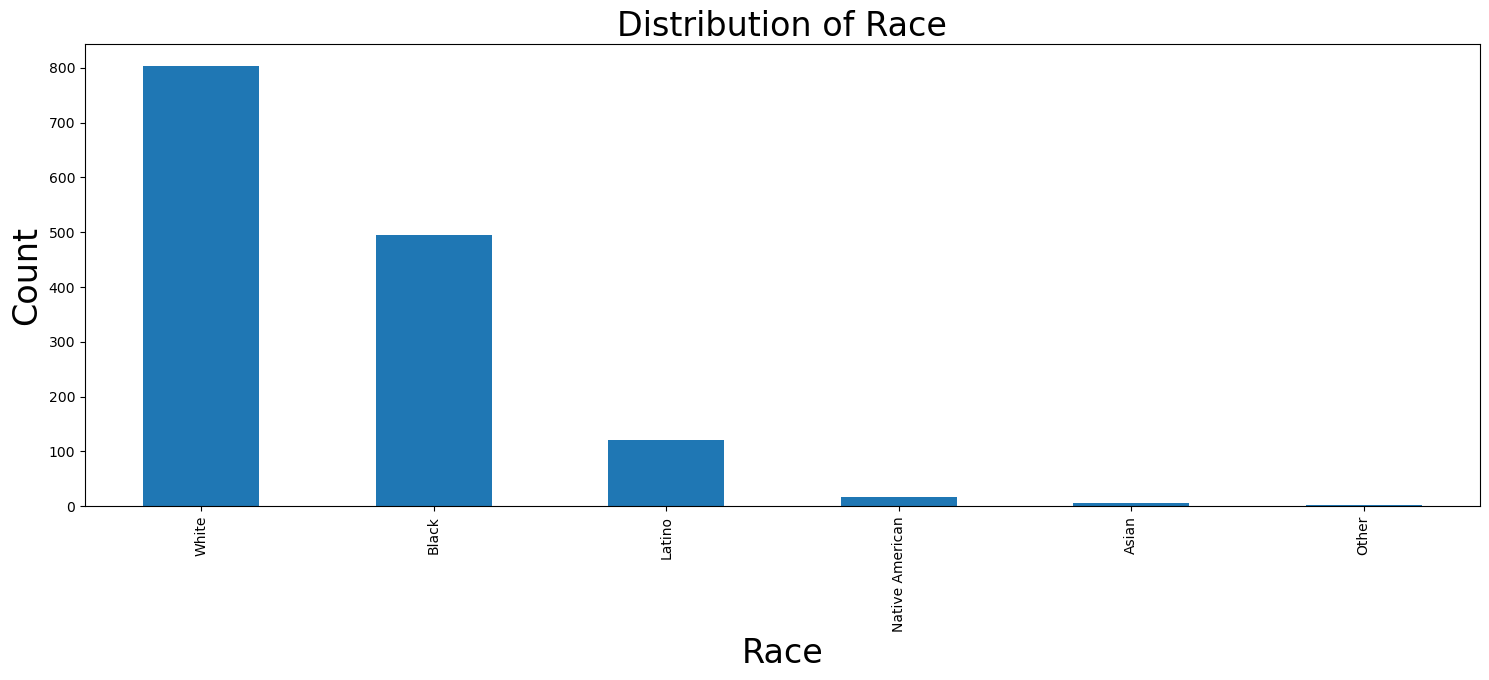

In [34]:
# Using a Bar plot for the race column:

race_counts.plot(kind='bar', figsize=(18, 6))
plt.title('Distribution of Race', fontsize=24)
plt.xlabel('Race', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.show()

# Age Distribution

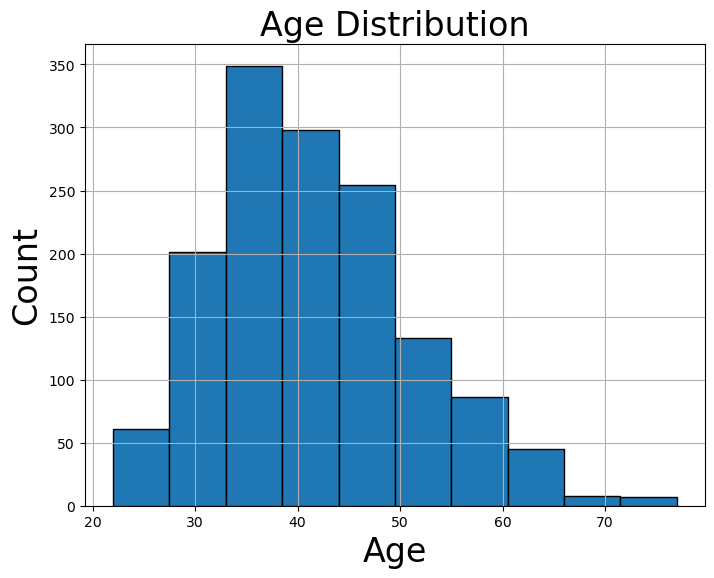

In [35]:
# using a Histogram for the age column:

Death_row['Age'].hist(bins=10, edgecolor='black', figsize=(8, 6))
plt.title('Age Distribution', fontsize=24)
plt.xlabel('Age', fontsize=24)
plt.ylabel('Count', fontsize=24)
plt.show()

# TOP 20 KILLERS BY VICTIM COUNT

In [36]:
top_killers = Death_row[['Name', 'Victim Count']].sort_values(by='Victim Count', ascending=False).head(20)
print(top_killers)

                  Name  Victim Count
716   Timothy McVeigh*           168
130     Ronald Simmons            16
236          John Gacy            12
1319      Manuel Pardo             9
1342     John Ferguson             8
636      Robert Carter             6
43     Marvin Francois             6
287     Roger Stafford             6
1351      Robert Jones             6
851        Carl Isaacs             6
89      Beauford White             6
1170  Marvallous Keene             5
711         Clay Smith             5
606      Larry Robison             5
194     Syvasky Poyner             5
98       Arthur Bishop             5
1051     Danny Rolling             5
1049  Jeffrey Lundgren             5
214        David Mason             5
1218    William Garner             5


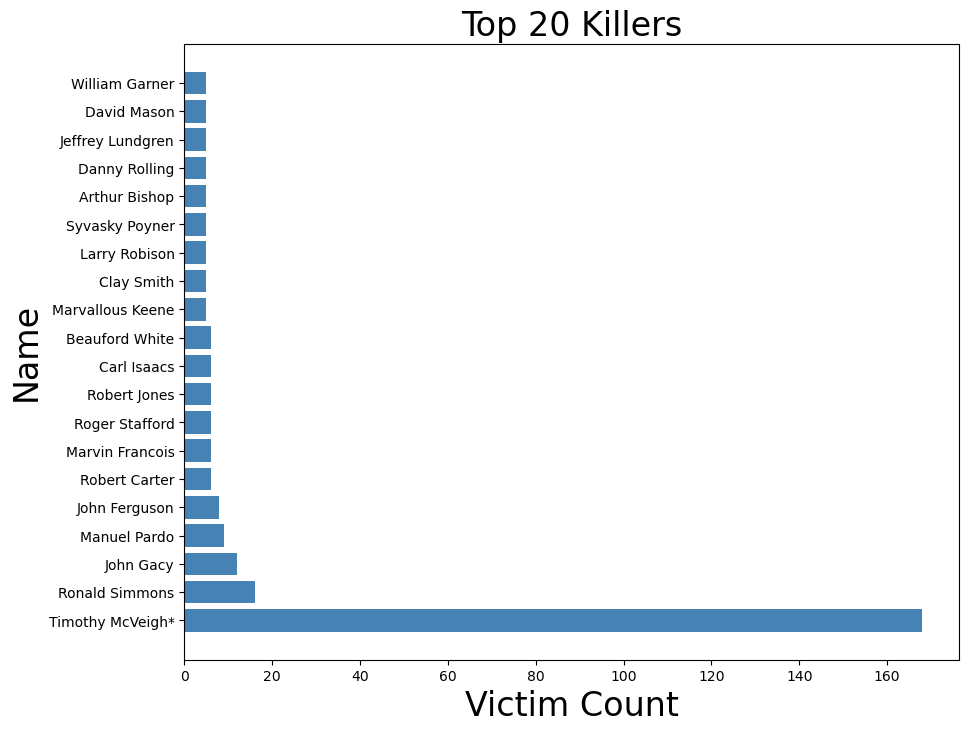

In [37]:
# Creating a bar plot
plt.figure(figsize=(10, 8))
plt.barh(top_killers['Name'], top_killers['Victim Count'], color='steelblue')

# Seting the labels and title of the plot
plt.xlabel('Victim Count', fontsize=24)
plt.ylabel('Name', fontsize=24)
plt.title('Top 20 Killers', fontsize=24)

# Displaying the plot
plt.show()